In [1]:
from sidechainnet.examples import get_alphabet_protein
import sidechainnet as scn
from sidechainnet.structure import fastbuild
from sidechainnet.utils.minimizer import SCNMinimizer
from sidechainnet.utils.openmm_loss import OpenMMEnergyH
import torch
from sidechainnet.structure.build_info import (_BACKBONE_ATOMS, _SUPPORTED_TERMINAL_ATOMS,
                                               ANGLE_NAME_TO_IDX_MAP, BB_BUILD_INFO,
                                               NUM_COORDS_PER_RES,
                                               NUM_COORDS_PER_RES_W_HYDROGENS,
                                               SC_ANGLES_START_POS, SC_HBUILD_INFO, ATOM_MAP_H)
import copy
torch.set_printoptions(sci_mode=False)
import numpy as np
np.set_printoptions(suppress=True)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.facecolor'] = 'white'


# Study differences between raw and rebuilt alphabet protein

In [47]:
p = get_alphabet_protein()
p
# p.to_pdb("alphabet1006.pdb")

SCNProtein(ALFA_1_A, len=21, missing=0, split='train')

In [48]:
# p = scn.load_pdb("/home/jok120/sidechainnet/sidechainnet/examples/alphabet_protein.pdb")
p.to_3Dmol()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [50]:
p.torch()
p.fastbuild(add_hydrogens=True, inplace=True)
p.to_3Dmol()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [51]:
p.get_energy()

Quantity(value=49129858.33025994, unit=kilojoule/mole)

In [52]:
p.get_energy_loss()

tensor(-1789.519, dtype=torch.float64, grad_fn=<OpenMMEnergyHBackward>)

In [10]:
minimizer = SCNMinimizer()
minimizer.minimize_scnprotein(p, epochs=200)

Starting loss = -1789.52
Epoch 0:	-1828.16
Epoch 0: Loss has been updated.  tensor(-1828.160, dtype=torch.float64, grad_fn=<OpenMMEnergyHBackward>)
Epoch 1:	-1885.63
Epoch 1: Loss has been updated.  tensor(-1885.634, dtype=torch.float64, grad_fn=<OpenMMEnergyHBackward>)
Epoch 2:	-1898.23
Epoch 3:	-1905.84
Epoch 3: Loss has been updated.  tensor(-1905.842, dtype=torch.float64, grad_fn=<OpenMMEnergyHBackward>)
Epoch 4:	-1911.55
Epoch 5:	-1913.76
Epoch 6:	-1920.32
Epoch 7:	-1921.58
Epoch 7: Loss has been updated.  tensor(-1921.576, dtype=torch.float64, grad_fn=<OpenMMEnergyHBackward>)
Epoch 8:	-1927.65
Epoch 9:	-1927.93
Epoch 10:	-1933.68
Epoch 11:	-1933.72
Epoch 12:	-1939.83
Epoch 12: Loss has been updated.  tensor(-1939.831, dtype=torch.float64, grad_fn=<OpenMMEnergyHBackward>)
Epoch 13:	-1939.47
Epoch 14:	-1945.44
Epoch 15:	-1944.97
Epoch 16:	-1950.97
Epoch 17:	-1950.00
Epoch 18:	-1955.75
Epoch 18: Loss has been updated.  tensor(-1955.752, dtype=torch.float64, grad_fn=<OpenMMEnergyHBac

KeyboardInterrupt: 

In [9]:
p.to_pdb("minimized_alphabet.pdb")

In [10]:
!pwd

/home/jok120/sidechainnet/sidechainnet/research/analysis


In [53]:
p.seq.find('V')

18

In [54]:
p.coords[18]

tensor([[ 7.669, -4.038,  7.860],
        [ 8.869, -4.362,  7.128],
        [ 8.978, -3.409,  5.977],
        [ 7.989, -3.178,  5.285],
        [   nan,    nan,    nan],
        [ 6.793, -4.298,  7.430],
        [   nan,    nan,    nan],
        [   nan,    nan,    nan],
        [ 8.859, -5.825,  6.694],
        [10.156, -6.148,  5.959],
        [ 8.732, -6.719,  7.924],
        [ 9.716, -4.178,  7.789],
        [ 8.012, -6.001,  6.031],
        [10.245, -5.509,  5.080],
        [11.003, -5.973,  6.622],
        [10.148, -7.193,  5.649],
        [ 7.804, -6.487,  8.448],
        [ 8.723, -7.764,  7.615],
        [ 9.578, -6.544,  8.589],
        [   nan,    nan,    nan],
        [   nan,    nan,    nan],
        [   nan,    nan,    nan],
        [   nan,    nan,    nan],
        [   nan,    nan,    nan],
        [   nan,    nan,    nan],
        [   nan,    nan,    nan],
        [   nan,    nan,    nan]], dtype=torch.float64,
       grad_fn=<SelectBackward0>)

In [55]:
p.get_atom_names(zip_coords=True)

0  N    [0. 0. 0.]
1  CA   [ 1.44200003 -0.         -0.        ]
2  C    [1.93245218 1.4154366  0.        ]
3  O    [ 1.86160216  2.07497806 -1.03461408]
4  OXT  [nan nan nan]
5  H    [nan nan nan]
6  H2   [-0.1657665   0.99630391 -0.        ]
7  H3   [-0.54905775 -0.32986962  0.78091072]
8  CB   [ 1.85676907 -0.4915977  -1.38822907]
9  CG   [ 0.77962203 -0.03377743 -2.35070809]
10 CD   [-0.44289597  0.03906962 -1.40739514]
11 HA   [ 1.88003537 -0.64822105  0.75896943]
12 HB2  [ 1.93158856 -1.5789057  -1.3719998 ]
13 HB3  [ 2.82152045 -0.07249782 -1.67407895]
14 HG2  [ 0.64659673 -0.74803052 -3.16326384]
15 HG3  [ 1.05593121  0.92955207 -2.77936826]
16 HD2  [-1.02105775  0.94188729 -1.60424307]
17 HD3  [-1.06872956 -0.83476719 -1.58861752]
18 PAD  [nan nan nan]
19 PAD  [nan nan nan]
20 PAD  [nan nan nan]
21 PAD  [nan nan nan]
22 PAD  [nan nan nan]
23 PAD  [nan nan nan]
24 PAD  [nan nan nan]
25 PAD  [nan nan nan]
26 PAD  [nan nan nan]
27 N    [2.44455637 1.90553249 1.18287623]
28 CA   [

In [56]:
print(p.to_pdbstr())

REMARK  pred
SEQRES   1 A   21  PRO ALA CYS ASP GLU PHE GLY HIS ILE LYS LEU MET ASN          
SEQRES   2 A   21  PRO GLN ARG SER THR VAL TRP TYR                              
ATOM      1  N   PRO A   1       0.000   0.000   0.000  1.00  0.00           N  
ATOM      2  CA  PRO A   1       1.442  -0.000  -0.000  1.00  0.00           C  
ATOM      3  C   PRO A   1       1.932   1.415   0.000  1.00  0.00           C  
ATOM      4  O   PRO A   1       1.862   2.075  -1.035  1.00  0.00           O  
ATOM      5  H2  PRO A   1      -0.166   0.996  -0.000  1.00  0.00           H  
ATOM      6  H3  PRO A   1      -0.549  -0.330   0.781  1.00  0.00           H  
ATOM      7  CB  PRO A   1       1.857  -0.492  -1.388  1.00  0.00           C  
ATOM      8  CG  PRO A   1       0.780  -0.034  -2.351  1.00  0.00           C  
ATOM      9  CD  PRO A   1      -0.443   0.039  -1.407  1.00  0.00           C  
ATOM     10  HA  PRO A   1       1.880  -0.648   0.759  1.00  0.00           H  
ATOM     11 HB2

In [2]:
binf_allatom = fastbuild.SC_ALL_ATOM_BUILD_PARAMS
binf_heavy = fastbuild.SC_HEAVY_ATOM_BUILD_PARAMS

In [3]:
binf_allatom['CA']['bond_lengths'].shape, binf_heavy['CA']['bond_lengths'].shape

(torch.Size([60, 19]), torch.Size([60, 10]))

In [4]:
binf_heavy_copy = copy.deepcopy(binf_heavy)

In [5]:
binf_heavy['CA']['bond_lengths'][6]

tensor([1.526, 1.504, 1.385, 1.343, 1.335, 1.394, 0.000, 0.000, 0.000, 0.000])

In [6]:
binf_allatom['CA']['bond_lengths'][6]

tensor([1.526, 1.504, 1.376, 1.345, 1.344, 1.399, 1.090, 1.090, 1.090, 1.010,
        1.080, 1.080, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       grad_fn=<SelectBackward0>)

In [8]:
def update_buildparams_for_heavy_atoms_with_full_buildparams(heavy_bp, full_bp):
    nres = len(fastbuild.AA)
    ncoords = NUM_COORDS_PER_RES_W_HYDROGENS - (
        len(_SUPPORTED_TERMINAL_ATOMS) + len(set(_BACKBONE_ATOMS + ['H']))
    )  # TODO Automate this by pulling out the max list of atom names in build info
    assert ncoords == 19
    for a in range(nres):
        A = fastbuild.AA[a]
        if len(A) == 2:
            # If this residue is an N or C terminal residue, the atoms built off of the
            # alpha Carbon are identical to the non-terminal residue version
            A = A[1]
        a3 = fastbuild.AA1to3[A]
        info = SC_HBUILD_INFO[a3]
        i = 0
        # print(len(info['torsion-vals']), ":")
        for i in range(ncoords):
            an = info['torsion-names'][i].split('-')[-1].strip() if i < len(info['torsion-vals']) else None
            if i >= len(info['torsion-vals']) or an.startswith("H"):
                break
       
        heavy_bp['CA']['bond_lengths'][a, :i] = full_bp['CA']['bond_lengths'][a, :i]
        heavy_bp['CA']['cthetas'][a, :i] = full_bp['CA']['cthetas'][a, :i]
        heavy_bp['CA']['sthetas'][a, :i] = full_bp['CA']['sthetas'][a, :i]
        heavy_bp['CA']['cchis'][a, :i] = full_bp['CA']['cchis'][a, :i]
        heavy_bp['CA']['schis'][a, :i] = full_bp['CA']['schis'][a, :i]
        heavy_bp['CA']['types'][a, :i] = full_bp['CA']['types'][a, :i]
        heavy_bp['CA']['offsets'][a, :i] = full_bp['CA']['offsets'][a, :i]
        heavy_bp['CA']['sources'][a, :i] = full_bp['CA']['sources'][a, :i]
    
    return heavy_bp



In [9]:
binf_heavy_updated = update_buildparams_for_heavy_atoms_with_full_buildparams(binf_heavy, binf_allatom)

In [20]:
fastbuild.AA2NUM['W']

18

In [22]:
idx = 18

In [23]:
#Original heavy
binf_heavy_copy['CA']['bond_lengths'][idx]

tensor([1.526, 1.495, 1.352, 1.381, 1.380, 1.400, 1.400, 1.400, 1.400, 1.404])

In [24]:
# Original all atom
binf_allatom['CA']['bond_lengths'][idx]

tensor([1.526, 1.495, 1.350, 1.378, 1.380, 1.398, 1.398, 1.400, 1.402, 1.406,
        1.090, 1.090, 1.090, 1.080, 1.010, 1.080, 1.080, 1.080, 1.080],
       grad_fn=<SelectBackward0>)

In [25]:
# Updated heavy using all atom params
binf_heavy_updated['CA']['bond_lengths'][idx]

tensor([1.526, 1.495, 1.350, 1.378, 1.380, 1.398, 1.398, 1.400, 1.402, 1.406],
       grad_fn=<SelectBackward0>)

In [ ]:
binf_allatom['CA']['names'][idx]

In [ ]:
fastbuild.get_all_atom_build_params()['CA']['bond_lengths'][idx]

# Compare Minimized Build Dict to Original Build Dict

In [3]:
min_bparams = fastbuild.SC_ALL_ATOM_BUILD_PARAMS
raw_bparams = fastbuild.get_all_atom_build_params()
for root_atom in ['N', 'CA', 'C']:
    raw_bparams[root_atom]['thetas'] = torch.atan2(raw_bparams[root_atom]['sthetas'],
                                        raw_bparams[root_atom]['cthetas'])
    raw_bparams[root_atom]['chis'] = torch.atan2(raw_bparams[root_atom]['schis'],
                                                   raw_bparams[root_atom]['cchis'])


In [4]:
raw_bparams.keys(), min_bparams['CA'].keys()

(dict_keys(['N', 'CA', 'C']),
 dict_keys(['bond_lengths', 'cthetas', 'sthetas', 'cchis', 'schis', 'types', 'offsets', 'sources', 'names', 'thetas', 'chis']))

In [5]:
raw_bparams['CA']['chis'], min_bparams['CA']['chis']

(tensor([[     0.000,      0.000,     -0.000,  ...,      0.000,      0.000,
               0.000],
         [     0.000,      0.000,      0.000,  ...,      0.000,      0.000,
               0.000],
         [     0.000,      0.000,      0.000,  ...,      0.000,      0.000,
               0.000],
         ...,
         [     0.000,      0.000,      0.000,  ...,      0.000,      0.000,
               0.000],
         [     0.000,      0.000,      0.000,  ...,      3.142,      3.142,
               3.142],
         [     0.000,      0.000,      0.000,  ...,      0.000,      0.000,
               0.000]]),
 tensor([[0.000, 0.000, 1.031,  ..., 0.000, 0.000, 0.000],
         [0.000, 0.000, 0.000,  ..., 0.000, 0.000, 0.000],
         [0.000, 0.000, 0.000,  ..., 0.000, 0.000, 0.000],
         ...,
         [0.000, 0.000, 0.000,  ..., 0.000, 0.000, 0.000],
         [0.000, 0.000, 0.000,  ..., 3.142, 3.142, 3.142],
         [0.000, 0.000, 0.000,  ..., 0.000, 0.000, 0.000]], requires_grad=True))

In [43]:
from sidechainnet.structure.fastbuild import NUM2AA, AA1to3

SC_HBUILD_INFO['HIS']['atom-names']
def ispad(anlist):
    newlist = ['P'] * 19
    for i in range(len(anlist)):
        newlist[i] = anlist[i]
    return newlist

def makelabels():
    padlabels = []
    for resnum in range(20):
        padlabels.append(ispad(SC_HBUILD_INFO[AA1to3[NUM2AA[resnum]]]['atom-names']))
    padlabels.extend(list(padlabels) + list(padlabels))
    return padlabels

# ispad(SC_HBUILD_INFO[AA1to3[NUM2AA[6]]]['atom-names'])
padlabels = makelabels()

bond_lengths torch.Size([60, 19])
60


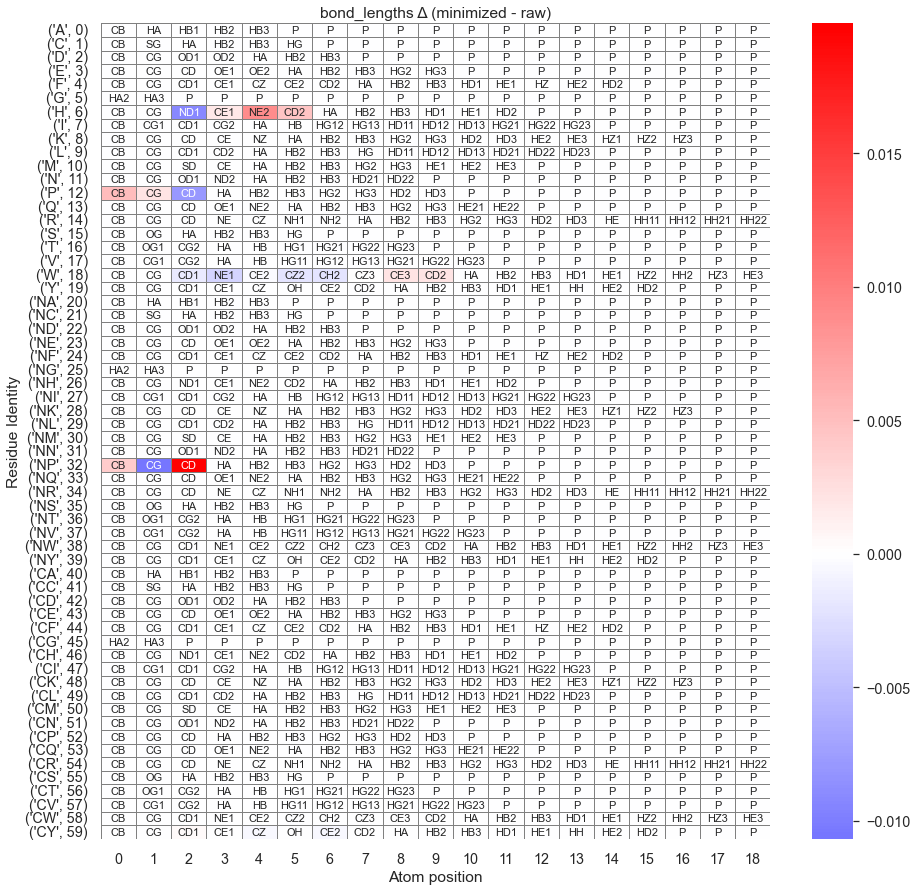

cthetas torch.Size([60, 19])
60


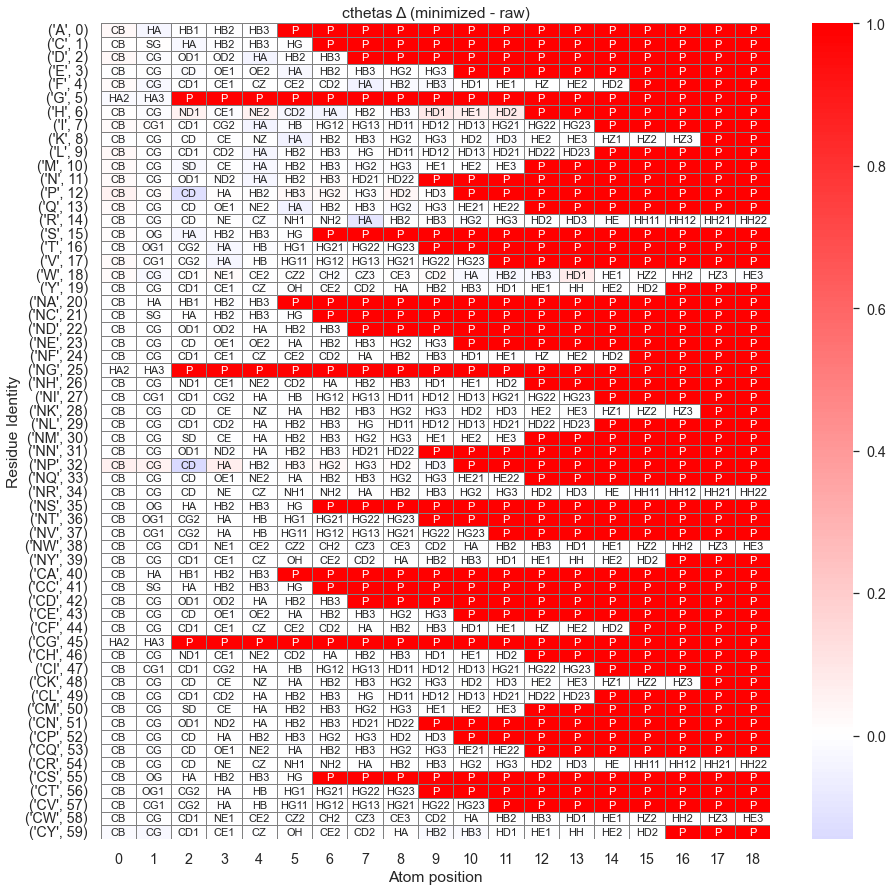

sthetas torch.Size([60, 19])
60


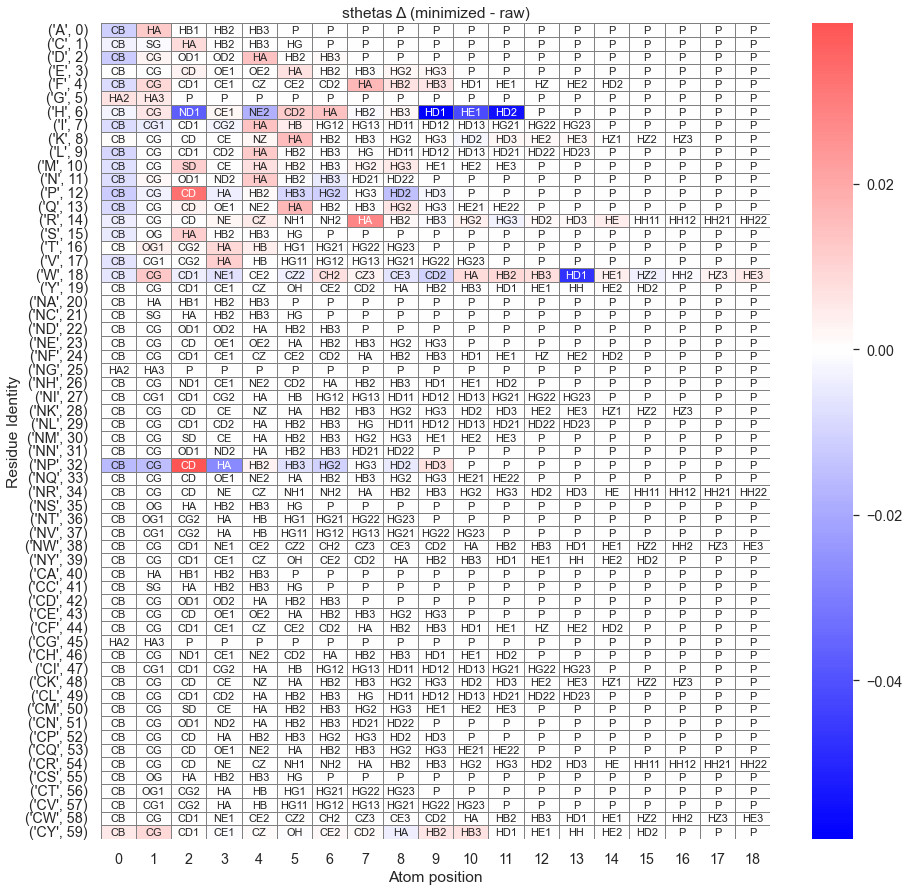

cchis torch.Size([60, 19])
60


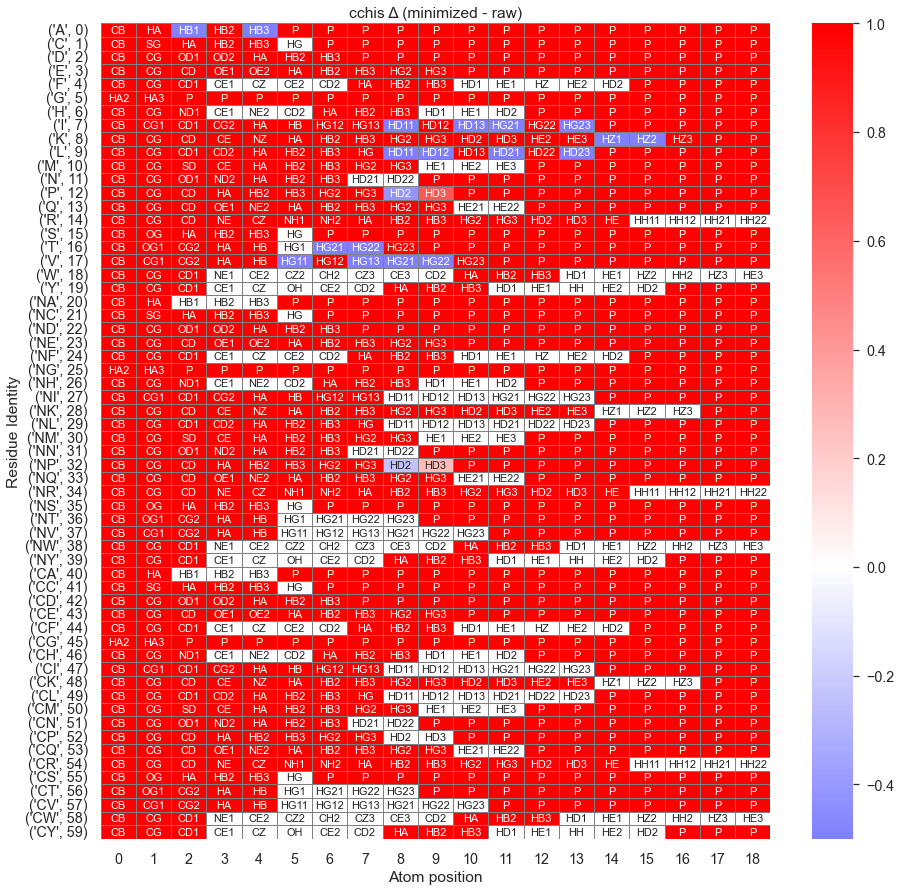

schis torch.Size([60, 19])
60


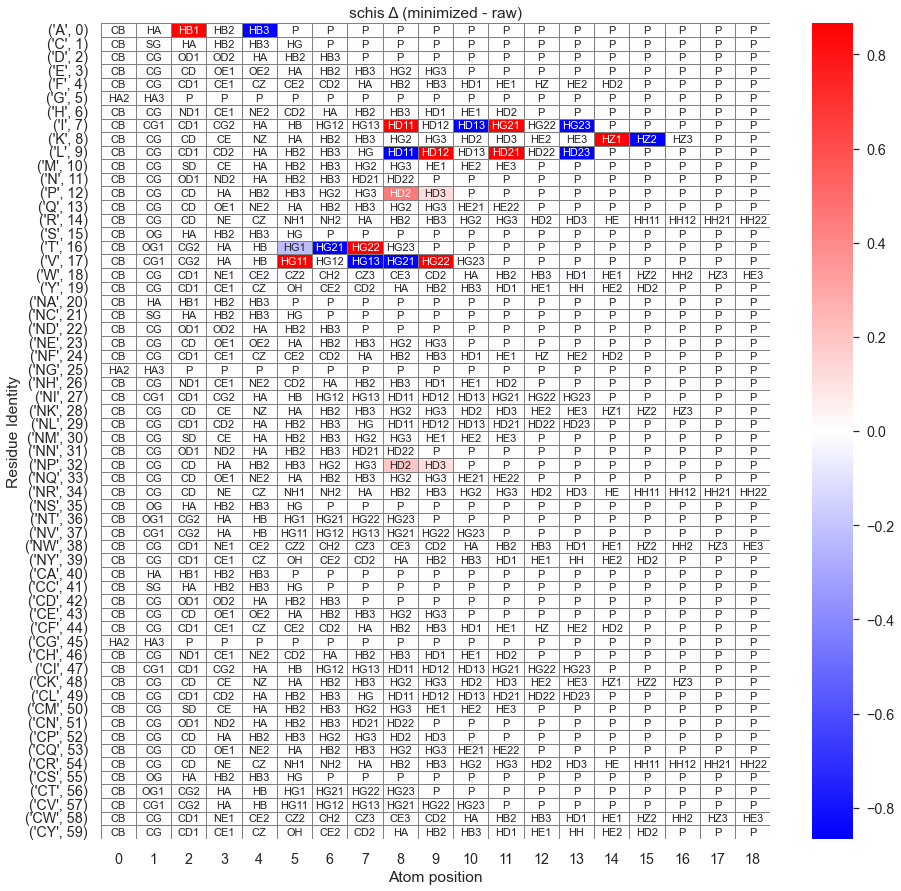

types torch.Size([60, 19])
60
No difference.
offsets torch.Size([60, 19])
60
No difference.
sources torch.Size([60, 19])
60
No difference.
thetas torch.Size([60, 19])
60


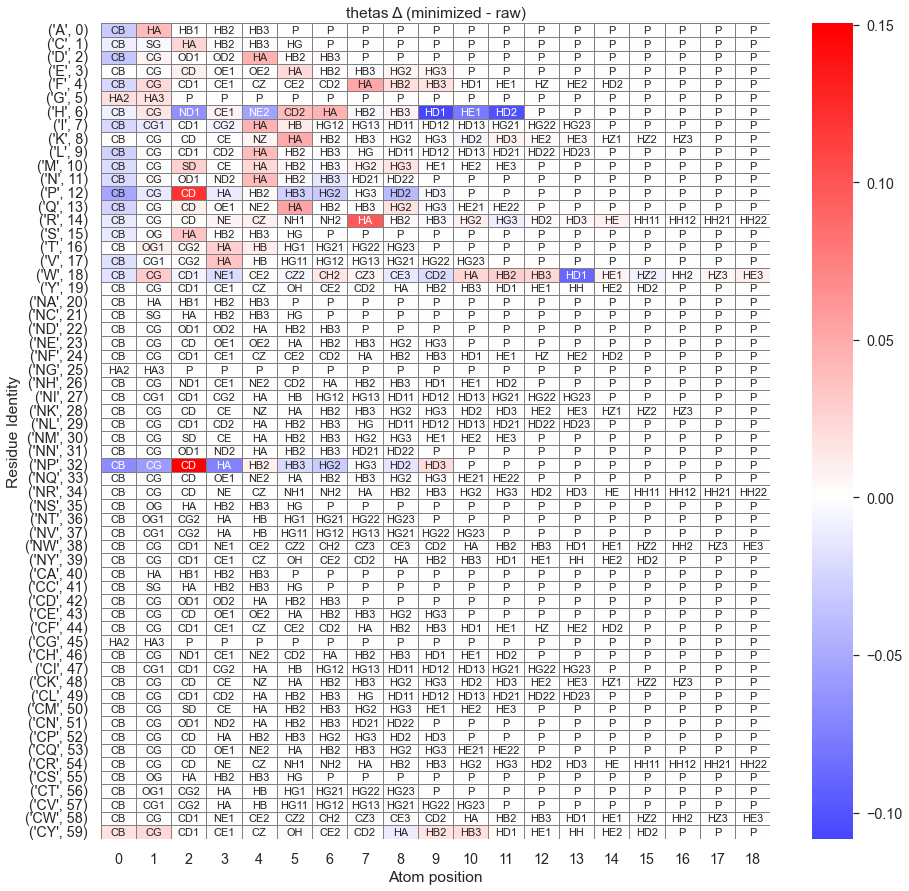

chis torch.Size([60, 19])
60


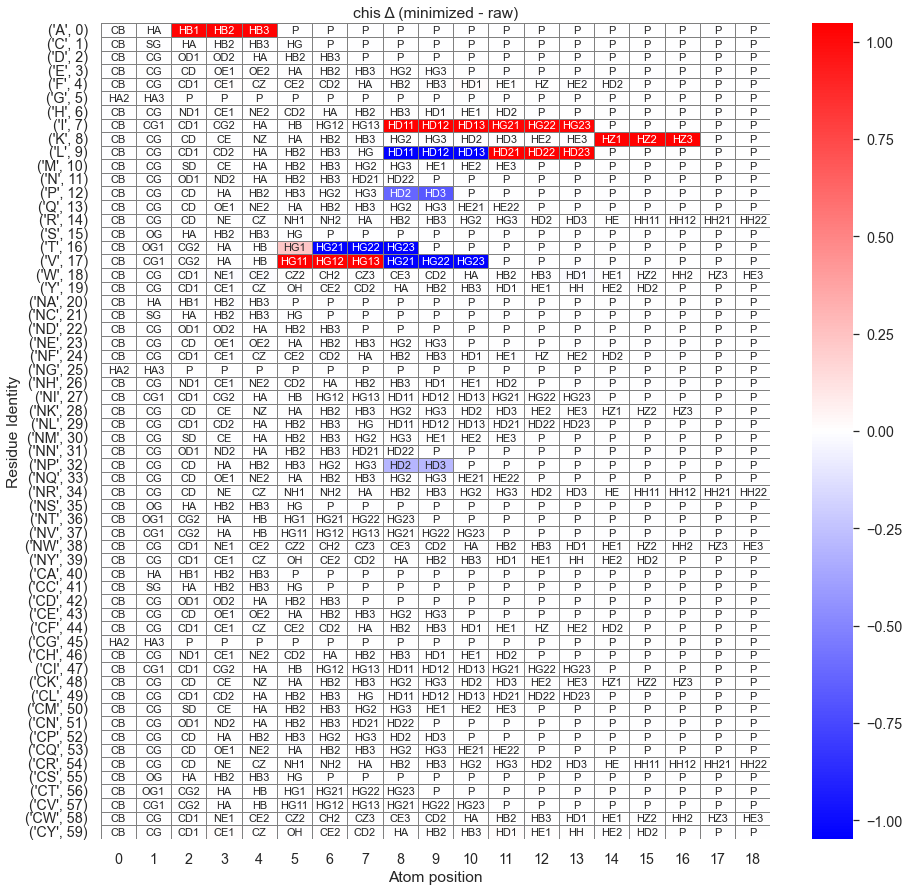

In [45]:
%matplotlib inline
from sidechainnet.structure.fastbuild import AA, AA1to3


for ((bparam_name, raw_bp_tensor), (bparam_name, min_bp_tensor)
    ) in zip(raw_bparams['CA'].items(), min_bparams['CA'].items()):
    if bparam_name == "names":
        continue
    diff = min_bp_tensor - raw_bp_tensor
    print(bparam_name, diff.shape)
    print(len(padlabels))
    if diff.sum() == 0:
        print("No difference.")
        continue
    with plt.style.context('seaborn'):
        sns.set(font_scale=1.3)
        scale = 2.5
        plt.figure(figsize = (6*scale,6*scale))
        g = sns.heatmap(diff.detach().numpy(),
            yticklabels=list(zip(AA, range(0,60))), linewidths=.5,
            linecolor='grey', center=0, cmap='bwr', annot=padlabels, fmt='', annot_kws={"fontsize":11},
            )
        # g.fig.set_size_inches(3*2, 4*2)
        plt.ylabel("Residue Identity")
        plt.xlabel("Atom position")
        plt.gca().set_facecolor("white")
        plt.title(bparam_name + " Δ (minimized - raw)")
        plt.yticks(rotation=0)
        
        plt.savefig(f"plots/minimized_raw_terminals{bparam_name}.png", dpi=200)
        plt.show()


bond_lengths torch.Size([60, 19])
thetas torch.Size([60, 19])
chis torch.Size([60, 19])


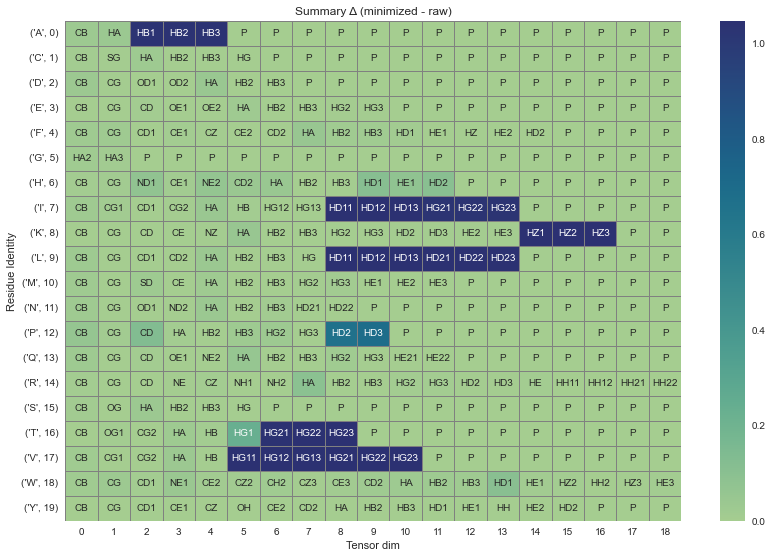

In [23]:
%matplotlib inline
from sidechainnet.structure.fastbuild import AA, AA1to3

total_diff = diff * 0.
for ((bparam_name, raw_bp_tensor), (bparam_name, min_bp_tensor)
    ) in zip(raw_bparams['CA'].items(), min_bparams['CA'].items()):
    if bparam_name not in ["thetas","chis","bond_lengths"]:
        continue
    diff = min_bp_tensor - raw_bp_tensor
    print(bparam_name, diff.shape)
    if diff.sum() == 0:
        continue
    total_diff += diff.abs()
with plt.style.context('seaborn'):
    plt.figure(figsize = (6*2.3,4*2.3))
    sns.heatmap(total_diff[:20].detach().numpy(),
        yticklabels=list(zip(AA[:20], range(0,20))), linewidths=.5,
        linecolor='grey', center=None, cmap='crest', annot=padlabels, fmt=''
        )
    plt.ylabel("Residue Identity")
    plt.xlabel("Tensor dim")
    plt.gca().set_facecolor("white")
    plt.title("Summary Δ (minimized - raw)")
    plt.yticks(rotation=0)
    plt.show()


In [17]:
p = get_alphabet_protein()
p.mask = "-" + p.mask[1:]
p.trim_edges()
print(p.seq)
p.torch()
p.fastbuild(add_hydrogens=True, inplace=True)
efunc = OpenMMEnergyH()
loss = efunc.apply(p, p.hcoords)
loss


ACDEFGHIKLMNPQRSTVWY


tensor(-1828.939, dtype=torch.float64, grad_fn=<OpenMMEnergyHBackward>)

In [18]:
from sidechainnet.structure.fastbuild import AA2NUM, AA3to1


raw_bparams['CA']['bond_lengths'][6], min_bparams['CA']['bond_lengths'][6]

(tensor([1.526, 1.504, 1.385, 1.343, 1.335, 1.394, 1.090, 1.090, 1.090, 1.010,
         1.080, 1.080, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000]),
 tensor([1.526, 1.504, 1.376, 1.345, 1.344, 1.399, 1.090, 1.090, 1.090, 1.010,
         1.080, 1.080, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
        grad_fn=<SelectBackward0>))

In [19]:
raw_bparams['CA']['sources'][6], min_bparams['CA']['sources'][6]

(tensor([-1,  0,  1,  2,  3,  4, -1,  0,  0,  2,  3,  5,  0,  0,  0,  0,  0,  0,
          0]),
 tensor([-1,  0,  1,  2,  3,  4, -1,  0,  0,  2,  3,  5,  0,  0,  0,  0,  0,  0,
          0]))

In [20]:
from sidechainnet.structure.fastbuild import get_all_atom_build_params


p = get_alphabet_protein()
# p.mask = "-" + p.mask[1:]
# p.trim_edges()
p.torch()
p.fastbuild(add_hydrogens=True, inplace=True, build_params=get_all_atom_build_params())
print("Energy before:", end=" ")
print(p.get_energy_loss())


p = get_alphabet_protein()
# p.mask = "-" + p.mask[1:]
# p.trim_edges()
p.torch()
p.fastbuild(add_hydrogens=True, inplace=True, build_params=None)
# efunc = OpenMMEnergyH()
# loss = efunc.apply(p, p.hcoords)
print("Energy after:", end=" ")
print(p.get_energy_loss())

Energy before: tensor(-1071.833, dtype=torch.float64)
Energy after: tensor(-1789.519, dtype=torch.float64, grad_fn=<OpenMMEnergyHBackward>)


In [21]:
from sidechainnet.structure.fastbuild import get_all_atom_build_params
data = {"before":{}, "after":{}}

print("Comparing protein energy (without nonbonded forces) before/after minimization"
      " of build parameters.\n")

p = get_alphabet_protein()
p.torch()
p.fastbuild(add_hydrogens=True, inplace=True, build_params=get_all_atom_build_params())
print("Energy before:")
p.openmm_initialized = False
data["before"]["nonbonded=False"] = p.get_energy_loss(nonbonded_interactions=False).item()

p = get_alphabet_protein()
p.torch()
p.fastbuild(add_hydrogens=True, inplace=True, build_params=None)
print("Energy after:")
p.openmm_initialized = False
data["after"]["nonbonded=False"] = p.get_energy_loss(nonbonded_interactions=False).item()

print("\n\nComparing protein energy (WITH nonbonded forces) before/after minimization "
      "of build parameters.\n")

p = get_alphabet_protein()
p.torch()
p.fastbuild(add_hydrogens=True, inplace=True, build_params=get_all_atom_build_params())
print("Energy before:")
data["before"]["nonbonded=True"] = p.get_energy_loss(nonbonded_interactions=True).item()

p = get_alphabet_protein()
p.torch()
p.fastbuild(add_hydrogens=True, inplace=True, build_params=None)
print("Energy after:")
data["after"]["nonbonded=True"] = p.get_energy_loss(nonbonded_interactions=True).item()

print(data)

Comparing protein energy (without nonbonded forces) before/after minimization of build parameters.

Energy before:
Removing <openmm.openmm.NonbondedForce; proxy of <Swig Object of type 'OpenMM::NonbondedForce *' at 0x7f405e5fed50> >.
Energy after:
Removing <openmm.openmm.NonbondedForce; proxy of <Swig Object of type 'OpenMM::NonbondedForce *' at 0x7f405e43d930> >.


Comparing protein energy (WITH nonbonded forces) before/after minimization of build parameters.

Energy before:
Energy after:
{'before': {'nonbonded=False': 31.133664474643638, 'nonbonded=True': -1071.8334637515143}, 'after': {'nonbonded=False': -326.31879714852096, 'nonbonded=True': -1789.5192230867842}}


In [1]:
import pandas as pd
with plt.style.context('default'):
    pd.DataFrame(data).plot(kind='bar', rot=0)
    plt.title("Alphabet Protein Energy Before/After Minimization")
    ax = plt.gca()
    ax.set_ylim(ax.get_ylim()[::-1])
# plt.savefig("energy_before_after_minimization.png")

NameError: name 'plt' is not defined

In [46]:
p = get_alphabet_protein()
p.torch()
p.fastbuild(add_hydrogens=True, inplace=True, build_params=get_all_atom_build_params())
p.to_pdb("default.pdb")

p = get_alphabet_protein()
p.torch()
p.fastbuild(add_hydrogens=True, inplace=True, build_params=None)
p.to_pdb("minparams.pdb")